# Visualisation ontologie

In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import graphviz as gv

In [4]:
!python owl_data_prop_to_json.py

{
    "AircraftDataProp": {
        "AircraftCharacteristics": {
            "AircraftDimensions": {
                "AircraftLength": "",
                "AircraftSpan": ""
            },
            "AircraftMasses": {
                "AircraftFuelCapacity": "",
                "AircraftMLW": ""
            },
            "AircraftRequirements": {
                "AircraftACN": "",
                "AircraftARFF": ""
            }
        },
        "AircraftFlightParameters": {
            "AircraftLiveParameters": {
                "AircraftLiveAltitude": "",
                "AircraftLiveCurrentWeight": "",
                "AircraftLiveMAR": "",
                "AircraftLiveSR": "",
                "AircraftLiveSpeeds": {
                    "AircraftLiveIAS": "",
                    "AircraftLiveVz": ""
                }
            },
            "AircraftReferenceParameters": {
                "AircraftReferenceClimb": {
                    "AircraftReferenceVclimb": ""
         

In [2]:
filename = "ontology_properties.json"

with open(filename) as f:
    dict_onto = json.load(f)

print(json.dumps(dict_onto, indent=2))

{
  "AircraftDataProp": {
    "AircraftCharacteristics": {
      "AircraftDimensions": {
        "AircraftLength": "",
        "AircraftSpan": ""
      },
      "AircraftMasses": {
        "AircraftFuelCapacity": "",
        "AircraftMLW": ""
      },
      "AircraftRequirements": {
        "AircraftACN": "",
        "AircraftARFF": ""
      }
    },
    "AircraftFlightParameters": {
      "AircraftLiveParameters": {
        "AircraftLiveAltitude": "",
        "AircraftLiveCurrentWeight": "",
        "AircraftLiveMAR": "",
        "AircraftLiveSR": "",
        "AircraftLiveSpeeds": {
          "AircraftLiveIAS": "",
          "AircraftLiveVz": ""
        }
      },
      "AircraftReferenceParameters": {
        "AircraftReferenceClimb": {
          "AircraftReferenceVclimb": ""
        },
        "AircraftReferenceCruise": {
          "AircraftReferenceCruiseAltitudes": {
            "AircraftReferenceCruiseFL": "",
            "AircraftReferenceMORA": "",
            "AircraftReferenc

In [3]:
g = nx.DiGraph()


def add_node(parent, mark):
    g.add_edges_from([(parent, mark)])

def depth_search(tree, node, tab):
    if isinstance(tree, str):
        return
    
    key = list(tree.keys())[0]
    for subnode, subtree in tree.items():
        if ('Aircraft' in node or 'Weather' in node or 'Aircraft' in subnode or 'Weather' in subnode): continue
        print(f"{'  '*tab}({node}) {subnode}")
        add_node(node, subnode)
        depth_search(subtree, subnode, tab+1)

In [4]:
depth_search(dict_onto, "Properties", 0)

(Properties) AirportDataProp
  (AirportDataProp) AirportARFFIndex
  (AirportDataProp) AirportAltitude
  (AirportDataProp) AirportCTRActiveHours
  (AirportDataProp) AirportCountry
  (AirportDataProp) AirportEstimatedDepartureTime
  (AirportDataProp) AirportEstimatedTimeOfArrival
  (AirportDataProp) AirportFuel
  (AirportDataProp) AirportGPSLatitude
  (AirportDataProp) AirportGPSLongitude
  (AirportDataProp) AirportHandling
  (AirportDataProp) AirportIATA
  (AirportDataProp) AirportICAOCode
  (AirportDataProp) AirportName
  (AirportDataProp) AirportOpeningHours
  (AirportDataProp) AirportParkingSpot
  (AirportDataProp) AirportWidthTaxiway
(Properties) ChecklistDataProp
  (ChecklistDataProp) ChecklistContent
  (ChecklistDataProp) ChecklistModel
  (ChecklistDataProp) ChecklistType
(Properties) FrequencyDataProp
  (FrequencyDataProp) FrequencyDescription
  (FrequencyDataProp) FrequencyMHz
  (FrequencyDataProp) FrequencyType
(Properties) NavaidDataProp
  (NavaidDataProp) NavaidAltitude
  (Na

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


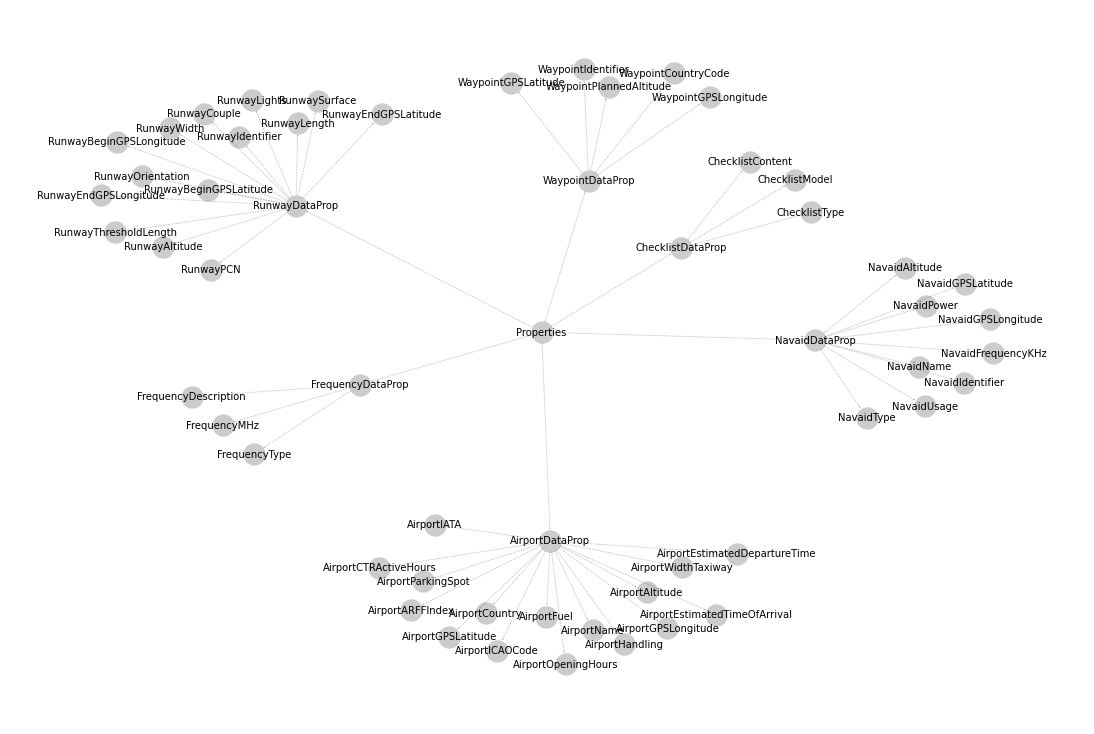

In [15]:
from networkx.drawing.nx_pydot import graphviz_layout
plt.figure(figsize=(15, 10))

# pos = graphviz_layout(g, prog="circo")
pos = graphviz_layout(g, prog="fdp")
nx.draw(g, pos, with_labels=True, node_size=500, node_color=(0,0,0,0.2), linewidths=0,
         font_size=10, arrowsize=2.0, style=':', edge_color=(0,0,0,0.2))

plt.savefig('ontology_graph.pdf', format='pdf', bbox_inches='tight')
# plt.show()

In [7]:
nx.drawing.nx_pydot.write_dot(g, 'networkx_graph')

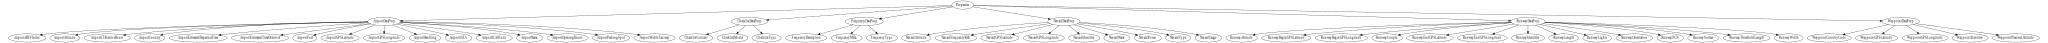

In [48]:
gv.render('dot', 'svg', 'networkx_graph')


from IPython.display import SVG, display
display(SVG('networkx_graph.svg'))

# from IPython.display import Image
# Image(filename='networkx_graph.png')